# AutoDiff

This automatic differentiation and optimization/root-finding Python module was created for the final project of CS207. Our group members are:
* Jiayin (Kay)
* Henry
* Lipika Ramswamy
* Anthony Rentsch

Install the package on for yourself from [PyPI]() and see our Github repository for installation and basic usage instructions. 

This notebook is intended to be demonstrate the functionality of our module.

# Import

In [14]:
# import AutoDiff as ad
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
from ADfun import *
from ElementaryFunctions import ElementaryFunctions as ef
from AutoDiffObject import AutoDiff as ad

# Basic functionality

In [12]:
# instantiate an AutoDiffObject --> i.e. the variable that we will differentiate
x = ad(2, "x")

# create a function using that variable
# for most basic functions, use our ElementaryFunctions module
f = ef.sin(x)

# check the values
print('Value:', f.val, '\nFirst derivative:', f.der, '\nSecond derivative:', f.der2)

Value: 0.9092974268256817 
First derivative: {'x': -0.4161468365471424} 
Second derivative: {'x': -0.9092974268256817}


# Visual inspection of what's going on 

In [60]:
fun_vals = []
der_vals = []
der2_vals = []
for i in np.linspace(0, 2*np.pi):
    x = ad(i, "x")
    f = ef.sin(x)
    fun_vals.append(f.val)
    der_vals.append(f.der["x"])
    der2_vals.append(f.der2["x"])

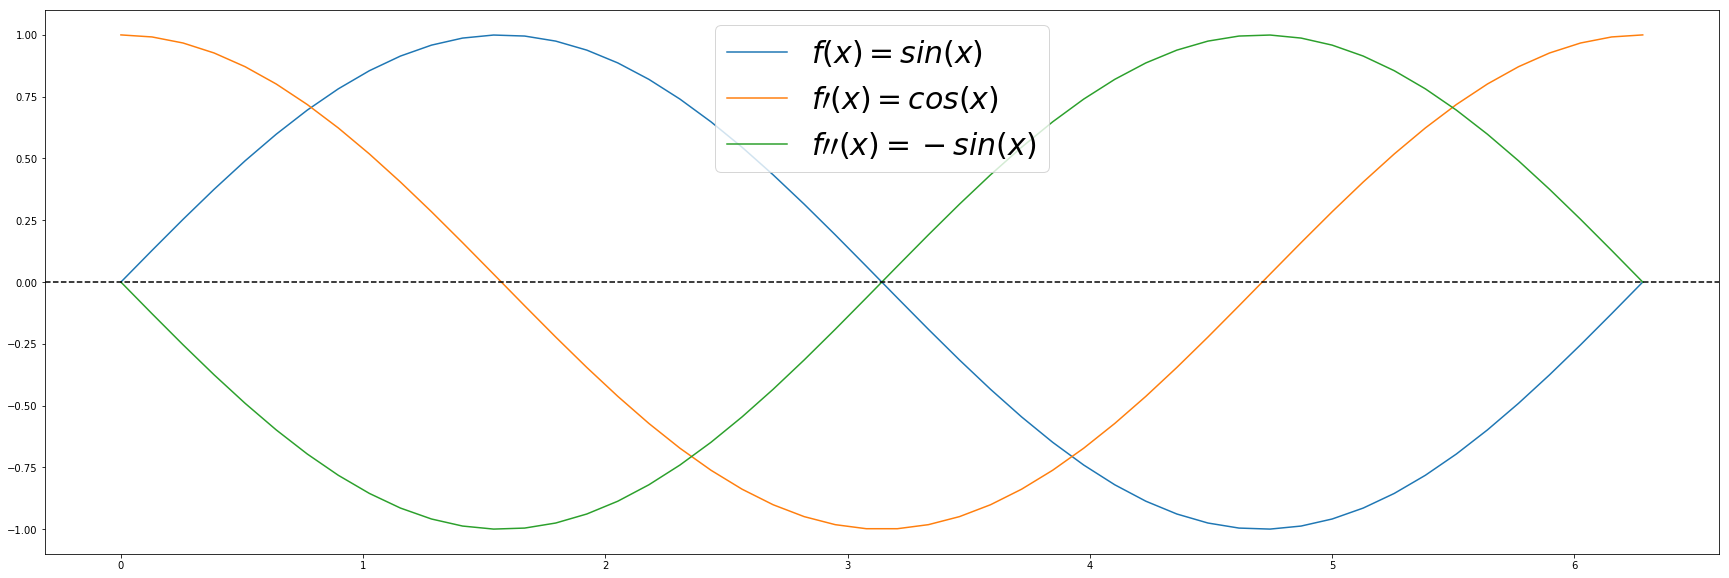

In [62]:
plt.figure(figsize=(30,10))
plt.plot(np.linspace(0, 2*np.pi), fun_vals, label=r"$f(x) = sin(x)$")
plt.plot(np.linspace(0, 2*np.pi), der_vals, label=r"$f\prime(x) = cos(x)$")
plt.plot(np.linspace(0, 2*np.pi), der2_vals, label=r"$f\prime\prime(x) = -sin(x)$")
plt.axhline(0,color='black',linestyle='--')
plt.legend(fontsize=30)
plt.show()

# Optimization and root-finding

**Methods Description & Instruction**

**Example: An Optimization Problem**

Consider the following function: 

$f(x, y) = 100 (y-x^2)^2 + (1-x)^2$

We can use our optimization methods to find the minimum of $f(x, y)$.

Firse define the function, which takes in an argument of vector x and returns a list of function values. 

In [39]:
def F(x):
    return [100*ef.power((x[1]-x[0]*x[0]),2) + ef.power((1-x[0]),2)]

Now, try our default quasi-Newton BFGS optimization method: 

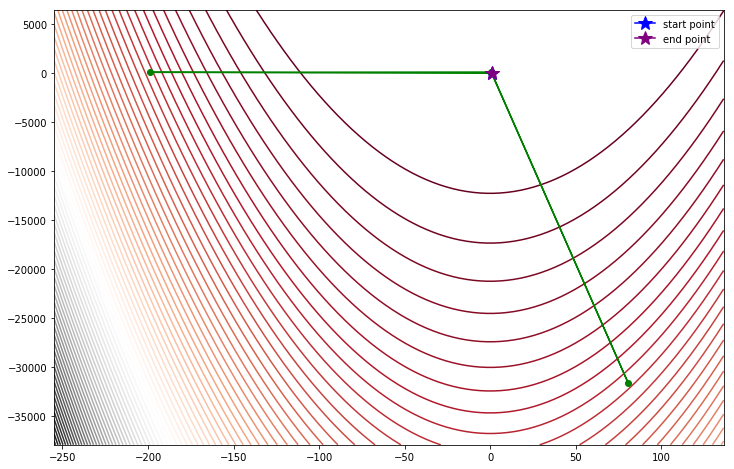

In [40]:
BGFS_result = Mini(F, [1, 0.5], plot = True)

Notice that by specifying "plot = True", we can visualize the iteration steps of the method to get to the solution. 

Now, we can try the newton's method for optimization: 

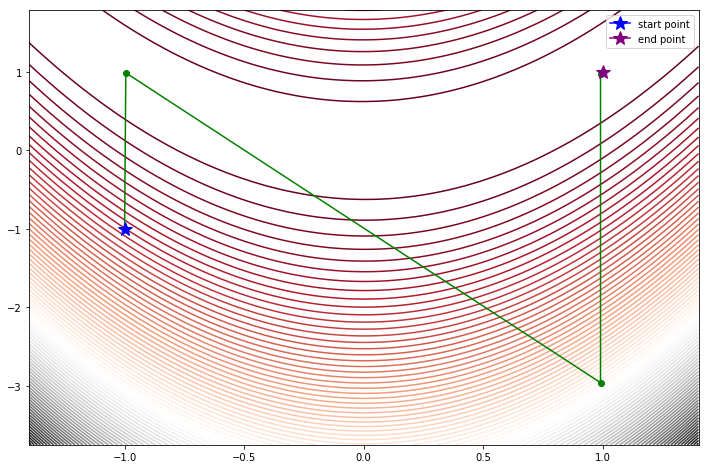

In [57]:
newton_result = Mini(F, [-1, -1], "newton", plot = True)

Lastly, we can try "gradient-descent":

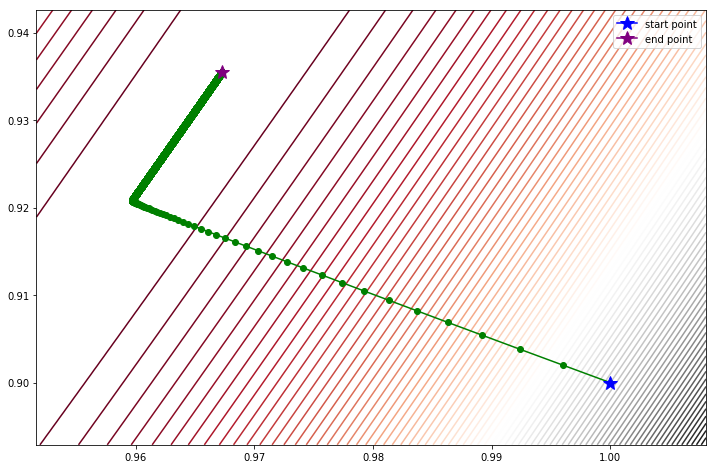

In [59]:
gd_result = Mini(F, [1, 0.9], "gradient-descent", plot = True)

We can compare the three methods: 

In [140]:
print("---------------------------------------Result Comparison------------------------------------")
print("   Items       |          BGFS          |           Newton         |        Gradient-Descent   ")
print("   x_min       |         {}        |           {}        |    {}    ".format(BGFS_result['x_min'], newton_result['x_min'], gd_result['x_min']))
print("   F(x_min)    | {} |            {}           |      {}   ".format(BGFS_result['min F(x)'][0], newton_result['min F(x)'][0], gd_result['min F(x)'][0]))
print("   # iterations|           {}           |             {}            |             {}    ".format(BGFS_result['number of iter'], newton_result['number of iter'], gd_result['number of iter']))


---------------------------------------Result Comparison------------------------------------
   Items       |          BGFS          |           Newton         |        Gradient-Descent   
   x_min       |         [1. 1.]        |           [1. 1.]        |    [0.96727347 0.9354844 ]    
   F(x_min)    | 1.9356504622572873e-21 |            0.0           |      0.001072809863097463   
   # iterations|           31           |             6            |             5000    


**Example: A Root-finding Problem**

Consider the following two-vector function: 

$f_1(x, y) = x^2 + 4\cdot y + sin(x) \cdot tan(y)$

$f_2(x, y) = y + \frac{xy}{sin(x)}$

We want to find a root $(x_0, y_0)$ of this system of equations, such that $f_1(x_0, y_0) = 0$ and $f_2(x_0, y_0) = 0$.

First we define the function that takes in a vector $x$ as a list as its argument, and output a list of function values:

In [53]:
def F2(x):
    F_1 = x[0] * x[0] +4 * x[1] + ef.sin(x[0])* ef.tan(x[1])
    F_2 = x[1] + x[0]*x[1] / ef.sin(x[0])
    return [F_1, F_2]

Now, we can use our newton's root finding method to find the numerical approximated root of the system:

In [60]:
Newton(F2, [3, 2])

{'x_min: ': array([-4.92447538e+04, -6.06176120e+08]),
 'F(x_min): ': array([3.41297274e+05, 1.04755551e+14]),
 'number of iter: ': 829}